In [1]:
import matplotlib
matplotlib.use('nbagg')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


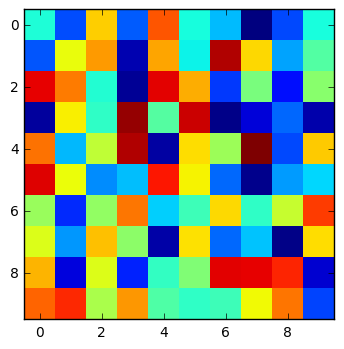

In [5]:
plt.imshow(np.random.rand(10,10), interpolation='none')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

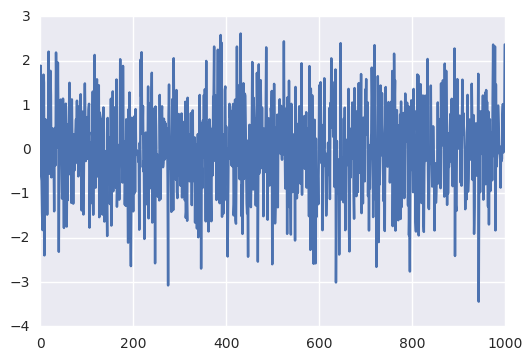

In [8]:
y = np.random.randn(1000)
plt.plot(y)

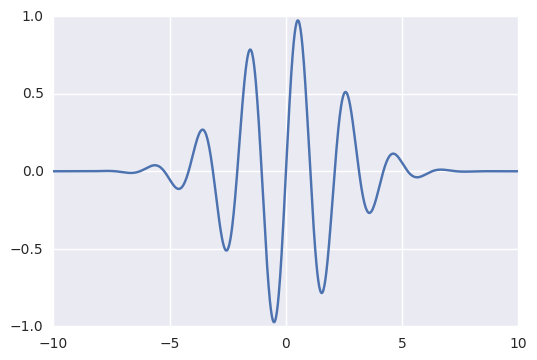

In [9]:
x = np.linspace(-10., 10., 1000 )
y = np.sin(3*x) * np.exp(-.1 * x**2)
plt.plot(x,y)

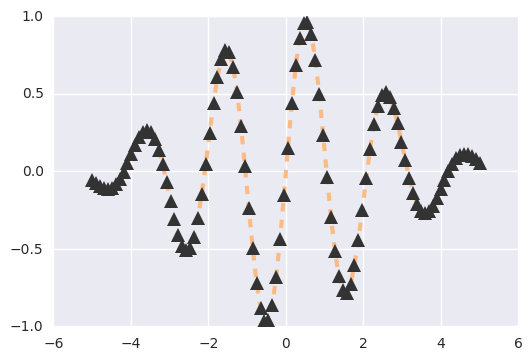

In [13]:
x = np.linspace(-5., 5., 100)
y = np.sin(3*x) * np.exp(-.1*x**2)
plt.plot(x,y, '--^',
        lw=3, color='#fdbb84',
        mfc='#333333', ms=10)

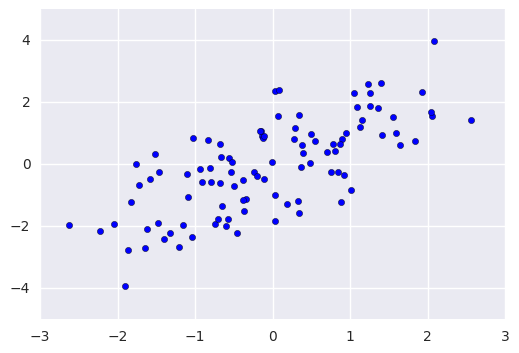

In [14]:
x = np.random.randn(100)
y = x + np.random.randn(100)
plt.scatter(x,y)

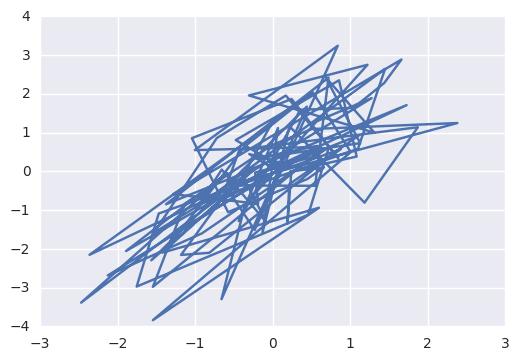

In [15]:
x = np.random.randn(100)
y = x + np.random.randn(100)
plt.plot(x,y)

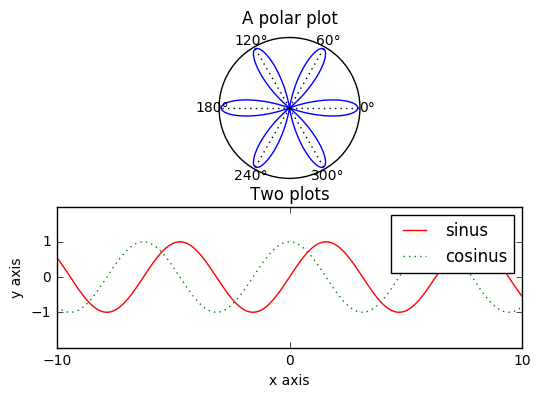

In [6]:
plt.subplot(2,1,2)
x = np.linspace(-10., 10., 1000)
plt.plot(x, np.sin(x), '-r', label='sinus')
plt.plot(x, np.cos(x), ':g', lw=1, label='cosinus')
plt.xticks([-10, 0, 10])
plt.yticks([-1, 0, 1])
plt.ylim(-2, 2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Two plots")
plt.legend()

plt.subplot(2,1,1, polar=True)
x = np.linspace(0,2 * np.pi, 1000)
plt.plot(x, 1+2*np.cos(6*x))
plt.yticks([])
plt.xlim(-.1, 3.1)
plt.ylim(-.1, 3.1)
plt.xticks(np.linspace(0, 5*np.pi/3, 6))
plt.title("A polar plot")
plt.grid(color='k', linewidth=1, linestyle=':')

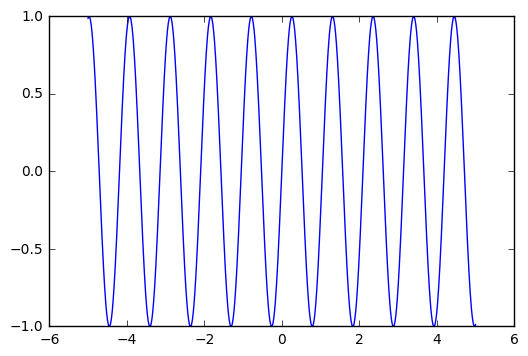

In [7]:
from ipywidgets import interact
x = np.linspace(-5., 5., 1000)
@interact
def plot_sin(a=(1,10)):
    plt.plot(x, np.sin(a*x))
    plt.ylim(-1, 1)

In [8]:
%matplotlib qt
lines = plt.plot([0,1], [0,1], 'b')
lines


ImportError: No module named 'PyQt4'

In [10]:
import seaborn as sns
df = sns.load_dataset("iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


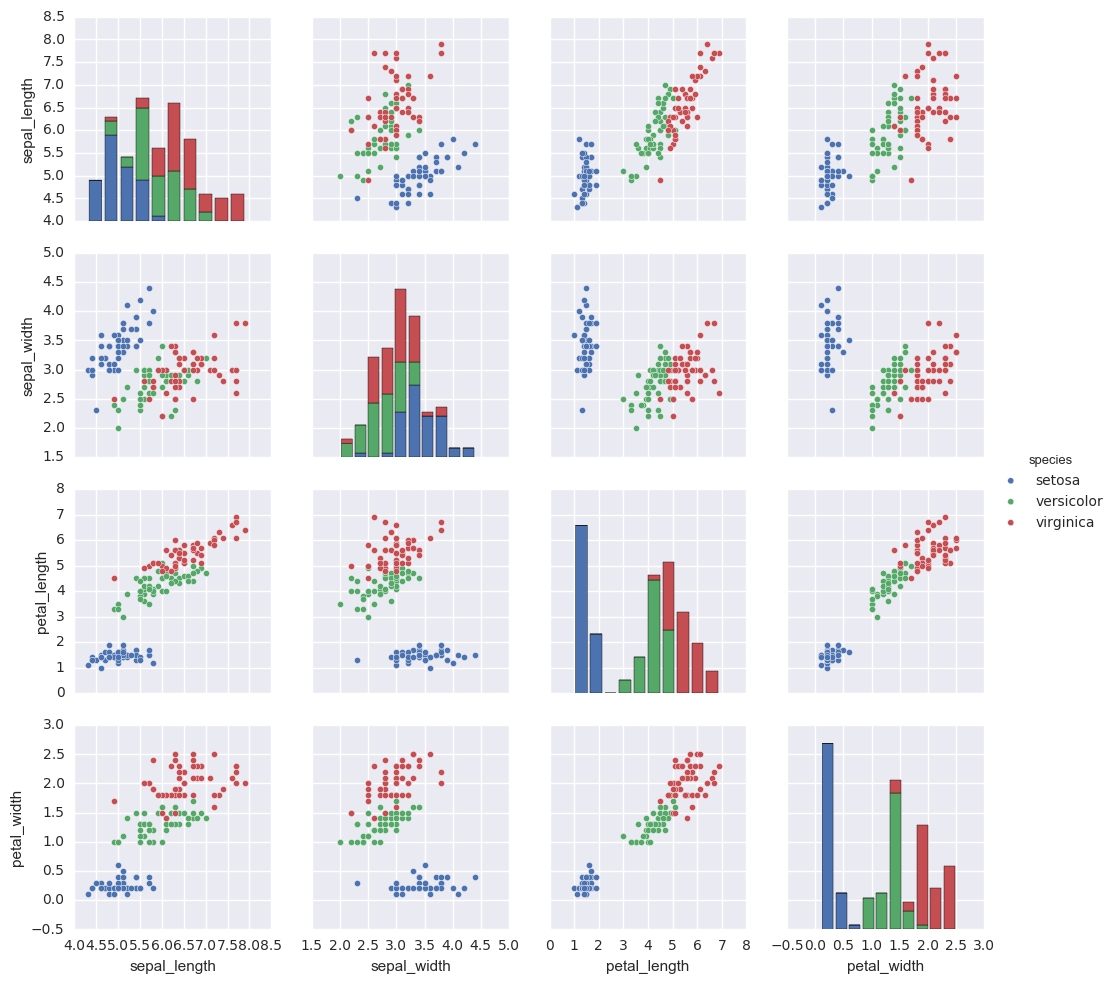

In [11]:
sns.pairplot(df, hue="species", size=2.5)

In [13]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [14]:
chelsea = skid.chelsea()

In [15]:
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

(-0.5, 450.5, 299.5, -0.5)

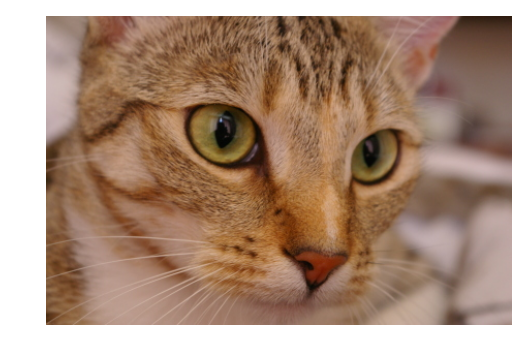

In [16]:
plt.imshow(chelsea)
plt.axis('off')

In [17]:
img = rgb2gray(chelsea)
img.shape, img.dtype

((300, 451), dtype('float64'))

In [18]:
img

array([[ 0.48523098,  0.48523098,  0.47738784, ...,  0.11692392,
         0.11692392,  0.11692392],
       [ 0.49699569,  0.49307412,  0.48523098, ...,  0.12336824,
         0.1225349 ,  0.1272898 ],
       [ 0.50849255,  0.50457098,  0.49475569, ...,  0.12336039,
         0.12728196,  0.13120353],
       ..., 
       [ 0.24786745,  0.29884784,  0.40501294, ...,  0.58914824,
         0.58914824,  0.58914824],
       [ 0.38173647,  0.42487373,  0.39628392, ...,  0.57403529,
         0.57403529,  0.57795686],
       [ 0.42487373,  0.36883294,  0.36042431, ...,  0.55442745,
         0.55442745,  0.55834902]])

In [19]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = skie.rescale_intensity(img, in_range=(p2, p98))
img_eq = skie.equalize_hist(img)
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

C:\Program Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [23]:
hist_types = dict([('Contrast stretching', img_rescale), 
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalizatioin', img_adapteq)])

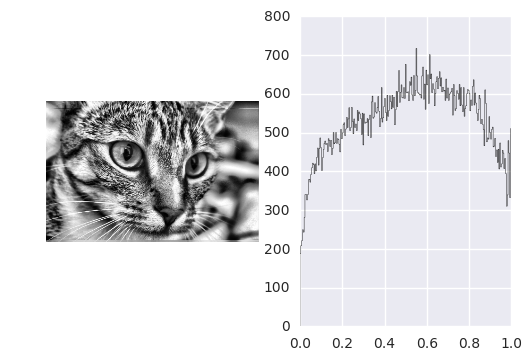

In [26]:
@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]
    
    #왼쪽에 처리한 흑백사진 출력
    plt.subplot(121)
    plt,imshow(result, cmap='gray')
    plt.axis('off')
    
    #오른쪽에 히스토그램 출력
    plt.subplot(122)
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256), 
            histtype='step', color='black')
    plt.show()